# Clasificador Naive Bayes con iris plant

### 1. Cargar base de datos iris plant

In [1]:
import pandas as pd

In [26]:
ds = pd.read_csv("../datasets/breast-cancer-wisconsin/PCA_breast-cancer-wisconsin.csv")

### separar la base de datos en caracteristicas y clases

In [27]:
x = ds[["x1","x2"]]
ds[["diagnosis"]] = ds[["diagnosis"]].replace(['B'],0)
ds[["diagnosis"]] = ds[["diagnosis"]].replace(['M'],1)
y = ds[["diagnosis"]]

In [47]:
#calculando probabilidad de que sea benigno
PBenigno = len(y[y["diagnosis"]==0])/len(y)
PMaligno = len(y[y["diagnosis"]==1])/len(y)
PTotal = PBenigno+PMaligno
print('probabilidad benigno',PBenigno)
print('probabilidad maligno',PMaligno)
print('probabilidad total',PTotal)

probabilidad benigno 0.6274165202108963
probabilidad maligno 0.37258347978910367
probabilidad total 1.0


### validación cruzada

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sbs
import matplotlib.pyplot as plt

#### Función para entrenar el modelo y mostrar matriz de confusión

In [38]:
def train_clf(model,X_train,X_test,y_train,y_test,labels):
    model.fit(X_train,y_train.values.ravel())
    model_predicted = model.predict(X_test)
    confusion_ma = confusion_matrix(y_test,model_predicted)
    accuracy = model.score(X_test,y_test.values.ravel())
    print("Predicción del modelo:")
    print(model_predicted)
    print("Valores reales:")
    print(y_test.values.ravel())    
    print('Precisión del modelo:',accuracy*100,'%')
    print('-----------\n')
    print("Matriz de confusión")
    sbs.heatmap(data=confusion_ma,cmap="Pastel1",annot=True,xticklabels=labels,yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("predicción")
    return confusion_ma    

#### función para mostrar la curva ROC del modelo

In [39]:
def plot_roc_curve(model,X_test,y_test):
    #El modelo debe estar ajustado previamente
    #model.fit(X_test,y_test.values.ravel())
    y_scores = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr,tpr)
    plt.title('Curva ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Verdadero Positivo')
    plt.xlabel('Falso Positivo')
    plt.show()

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
probs = [PBenigno,PMaligno]

Predicción del modelo:
[0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0]
Valores reales:
[0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0]
Precisión del modelo: 86.8421052631579 %
-----------

Matriz de confusión


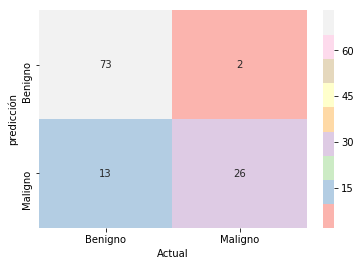

In [88]:
NBayes =GaussianNB(priors=probs)
labels = ["Benigno","Maligno"]
conf_ma = train_clf(model=NBayes,X_train=x_train,X_test=x_test,y_train=y_train,y_test=y_test,labels=labels)

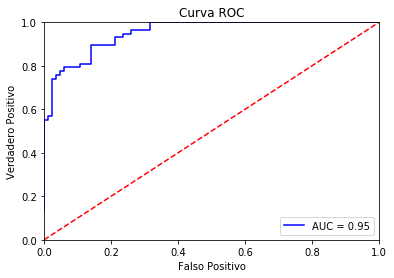

In [54]:
plot_roc_curve(model=NBayes,X_test=x_test,y_test=y_test)

In [57]:
import numpy as np

In [89]:
train_prec = []
test_prec  = []
size_list = list(np.arange(0.25,0.75,0.05))
for i in size_list:
    t_size=round(i,2)
    print('test_size',t_size)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size)
    NBayes.fit(x_train,y_train.values.ravel())
    train_prec.append(NBayes.score(x_train,y_train.values.ravel()))
    test_prec.append(NBayes.score(x_test,y_test.values.ravel()))

test_size 0.25
test_size 0.3
test_size 0.35
test_size 0.4
test_size 0.45
test_size 0.5
test_size 0.55
test_size 0.6
test_size 0.65
test_size 0.7


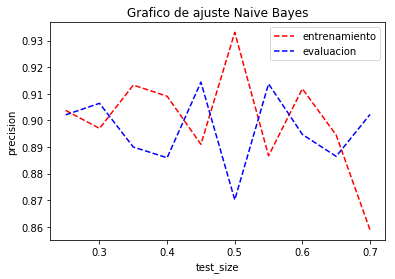

In [90]:
# graficar los resultados.
plt.plot(size_list, train_prec, 'r--', label='entrenamiento')
plt.plot(size_list, test_prec, 'b--', label='evaluacion')
plt.title('Grafico de ajuste Naive Bayes')
plt.legend()
plt.xlabel('test_size')
plt.ylabel('precision')
plt.show()

In [77]:
plt.(size_list, train_prec, color='r', label='entrenamiento')
plt.plot(size_list, test_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

[0.25,
 0.3,
 0.35,
 0.39999999999999997,
 0.44999999999999996,
 0.49999999999999994,
 0.5499999999999999,
 0.5999999999999999,
 0.6499999999999999,
 0.7]